In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("scores.txt", names=['dimCount', 'scores'], sep=";")

df.head()

,dimCount,scores
0,0,0
1,1,"1,0.898209,1,1,0,1,1,1,1,-0.45282,1,1,1,1,0.90..."
2,2,"1,1,1,0.952817,1,1,1,1,1,0.922849,0.913138,1,1..."
3,3,"1,1,1,0.922792,0.933916,1,1,1,1,1,1,0,1,0.0993..."
4,4,"1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dimCount  500 non-null    int64 
 1   scores    500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [5]:
df['scores'] = df['scores'][df['scores']!='0']
df = df.dropna()

In [6]:
df.head(30)

,dimCount,scores
1,1,"1,0.898209,1,1,0,1,1,1,1,-0.45282,1,1,1,1,0.90..."
2,2,"1,1,1,0.952817,1,1,1,1,1,0.922849,0.913138,1,1..."
3,3,"1,1,1,0.922792,0.933916,1,1,1,1,1,1,0,1,0.0993..."
4,4,"1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,..."
5,5,"1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
6,6,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,..."
7,7,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
8,8,"1,1,1,1,1,1,1,1,1"


In [7]:
df['scores'] = df['scores'].map(lambda a: a.split(','))

In [8]:
df['scores'] = df['scores'].map(lambda a: np.array(a).astype(float))

In [9]:
df.head()

,dimCount,scores
1,1,"[1.0, 0.898209, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
2,2,"[1.0, 1.0, 1.0, 0.952817, 1.0, 1.0, 1.0, 1.0, ..."
3,3,"[1.0, 1.0, 1.0, 0.922792, 0.933916, 1.0, 1.0, ..."
4,4,"[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
5,5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


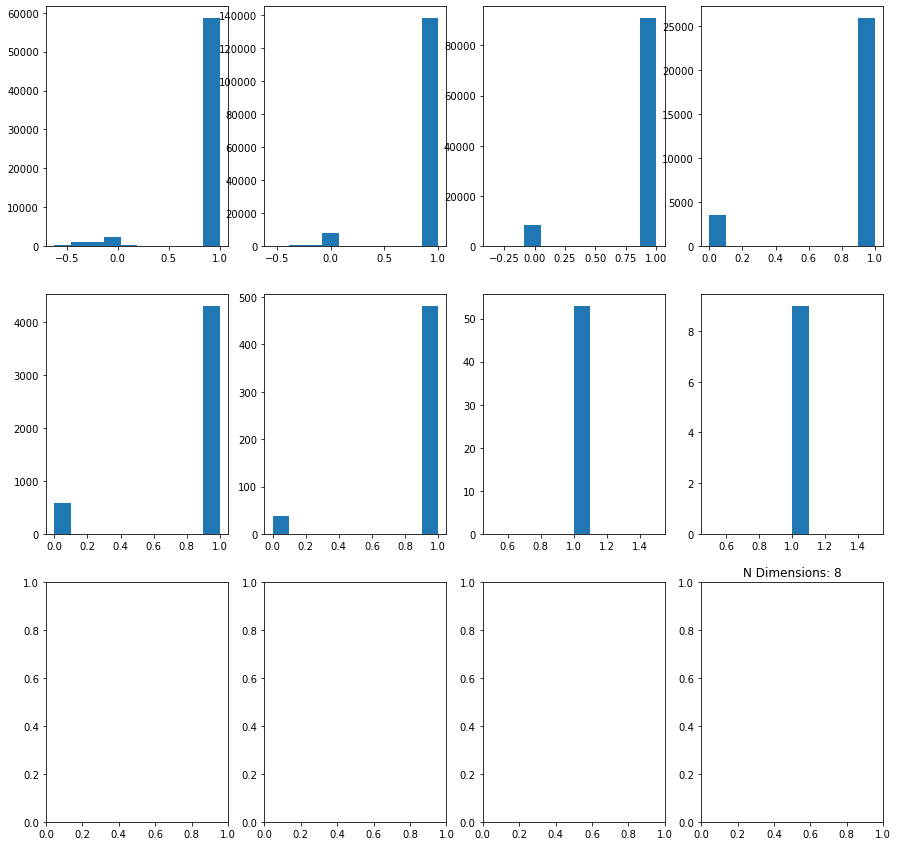

In [17]:
nEntries = df.shape[0]

fig, axs = plt.subplots(int(nEntries / 4 + 1), 4, figsize=(15, 15))

i = 0

for index, row in df.T.iteritems():
    plt.title('N Dimensions: ' + str(index))
    axs[int(i / 4), int(i % 4)].hist(row['scores'])

    i = i + 1